Analisis de la carrera en el Barça de Messi
==

Ante la duda sobre que significan alguno de estos items, podemos visitar la [explicacion de las columnas](https://www.kaggle.com/abhijithchandradas/lionel-messi-at-f-c-barcelona/version/1).

<img src="https://as01.epimg.net/futbol/imagenes/2021/03/21/primera/1616352554_970003_1616352733_noticia_normal_recorte1.jpg" />

Si hay algo raro que nos toco ver ultimamente, es verlo a Messi con una camiseta distinta a la del Barça. Como bien lo dijo el idolo:

_"El Barça es mi vida. Amo al Barça y a Barcelona. Siempre lo he dado todo por este Club"_

En honor a la carrera del idolo argentino en el club catalan, analisemos su paso por el Barça en numeros.

## Importar los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
messi_csv = pd.read_csv('messi_barca.csv', encoding = "ISO-8859-1", delimiter=',')  
messi_csv

,Season,Age,Competition,Matches Played,Starts,Minutes played,Goals scored,Assists,PK,PKatt,CrdY,CrdR,Goal/90,Ast/90,G+A/90,G-PK/90,G+A-PK/90
0,2004-2005,17,Champions League,1,1,90,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
1,2004-2005,17,La Liga,7,0,70,1,0,0,0,0,0,1.29,0.00,1.29,1.29,1.29
2,2005-2006,18,Champions League,6,4,322,1,1,0,0,0,0,0.28,0.28,0.56,0.28,0.56
3,2005-2006,18,La Liga,17,11,911,6,3,0,0,2,0,0.59,0.30,0.89,0.59,0.89
4,2006-2007,19,Champions League,5,4,385,1,0,0,0,1,0,0.23,0.00,0.23,0.23,0.23
5,2006-2007,19,La Liga,26,23,1983,14,3,0,0,2,0,0.64,0.14,0.77,0.64,0.77
6,2007-2008,20,Champions League,9,9,728,6,2,1,1,2,0,0.74,0.25,0.99,0.62,0.87
7,2007-2008,20,La Liga,27,23,1973,10,12,4,4,2,0,0.46,0.55,1.00,0.27,0.82
8,2008-2009,21,Champions League,12,10,927,9,5,0,0,1,0,0.87,0.49,1.36,0.87,1.36
9,2008-2009,21,La Liga,31,27,2516,23,11,3,4,2,0,0.82,0.39,1.22,0.72,1.11


In [3]:
messi_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Season          43 non-null     object 
 1   Age             43 non-null     int64  
 2   Competition     43 non-null     object 
 3   Matches Played  43 non-null     int64  
 4   Starts          43 non-null     int64  
 5   Minutes played  43 non-null     int64  
 6   Goals scored    43 non-null     int64  
 7   Assists         43 non-null     int64  
 8   PK              43 non-null     int64  
 9   PKatt           43 non-null     int64  
 10  CrdY            43 non-null     int64  
 11  CrdR            43 non-null     int64  
 12  Goal/90         43 non-null     float64
 13  Ast/90          43 non-null     float64
 14  G+A/90          43 non-null     float64
 15  G-PK/90         43 non-null     float64
 16  G+A-PK/90       43 non-null     float64
dtypes: float64(5), int64(10), object(2)
m

In [4]:
messi_csv.keys()

Index(['Season', 'Age', 'Competition', 'Matches Played', 'Starts',
       'Minutes played', 'Goals scored', 'Assists', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'Goal/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90'],
      dtype='object')

Importamos algunas librerias

In [5]:
import graphviz
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Datos

In [6]:
competiciones = messi_csv['Competition']
comp = []
for c in competiciones:
    if c == 'Champions League':
        comp.append(0)
    if c == 'La Liga':
        comp.append(1)
    if c == 'Copa del Rey':
        comp.append(2)
    if c == 'Supercopa de España':
        comp.append(3)
        
Y = np.array(comp)
X = np.array(messi_csv[['Matches Played', 'Goals scored']])

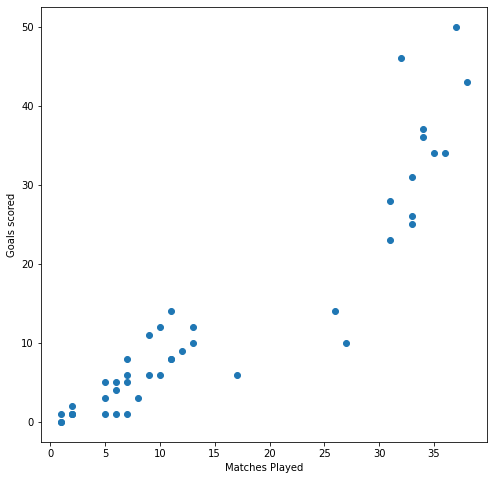

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Matches Played')
plt.ylabel('Goals scored')
plt.show()

In [8]:
X.shape

(43, 2)

In [9]:
Y.shape

(43,)

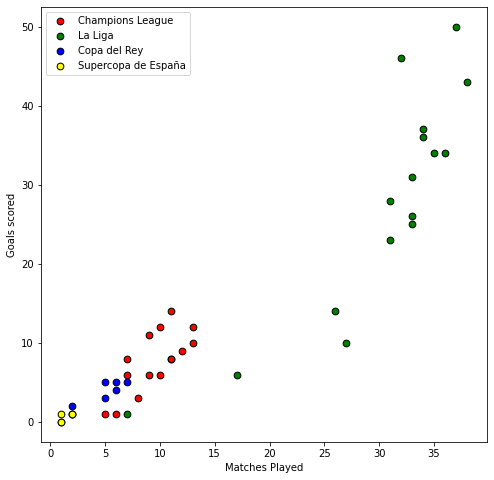

In [10]:
cdict = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}
catdict= {0:'Champions League', 1: 'La Liga', 2:'Copa del Rey', 3:'Supercopa de España'}

figure, ax = plt.subplots(figsize=(8,8))

labels = Y
for g in np.unique(labels):
    ix = np.where(g == labels)
    ax.scatter(X[ix,0], X[ix,1], c = cdict[g], label = catdict[g], s = 45,edgecolor='k')

plt.xlabel('Matches Played')
plt.ylabel('Goals scored')
ax.legend()
plt.show()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=12, shuffle=True)

# KNN

In [12]:
knn = KNeighborsClassifier(5)

In [13]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn.predict(x_test)

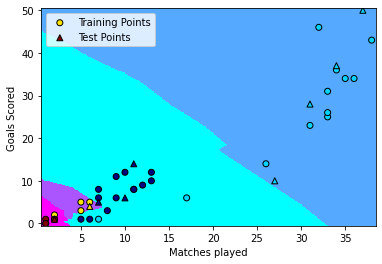

In [15]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5,  X[:, 0].max() + 0.5
y_min, y_max =  X[:, 1].min() - 0.5,  X[:, 1].max() + 0.5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = "cool", shading ='auto')

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors="k", cmap="jet",label='Training Points')
# Plot also the testing points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, edgecolors="k", cmap="jet",marker="^",label='Test Points')
plt.legend(loc="upper left")
plt.xlabel("Matches played")
plt.ylabel("Goals Scored")

plt.show()

In [16]:
cm = confusion_matrix(y_test, y_pred)

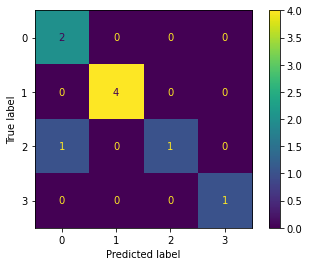

In [17]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [18]:
y_pred_train = knn.predict(x_train)

In [19]:
cm_train = confusion_matrix(y_train, y_pred_train)

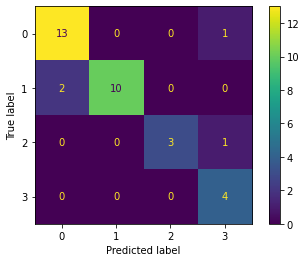

In [20]:
cm_display = ConfusionMatrixDisplay(cm_train).plot()

# Arboles de decision

In [21]:
arbol = DecisionTreeClassifier(max_depth = 5)

In [22]:
arbol.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [23]:
y_pred = arbol.predict(x_test)

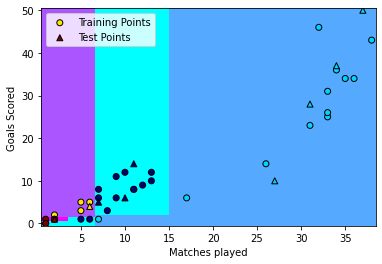

In [24]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5,  X[:, 0].max() + 0.5
y_min, y_max =  X[:, 1].min() - 0.5,  X[:, 1].max() + 0.5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = arbol.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = "cool", shading ='auto')

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors="k", cmap="jet",label='Training Points')
# Plot also the testing points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, edgecolors="k", cmap="jet",marker="^",label='Test Points')
plt.legend(loc="upper left")
plt.xlabel("Matches played")
plt.ylabel("Goals Scored")

plt.show()

In [25]:
features_names = ['Matches Played', 'Goals scored']
y_names = ['Champions League', 'La Liga','Copa del Rey','Supercopa de España']

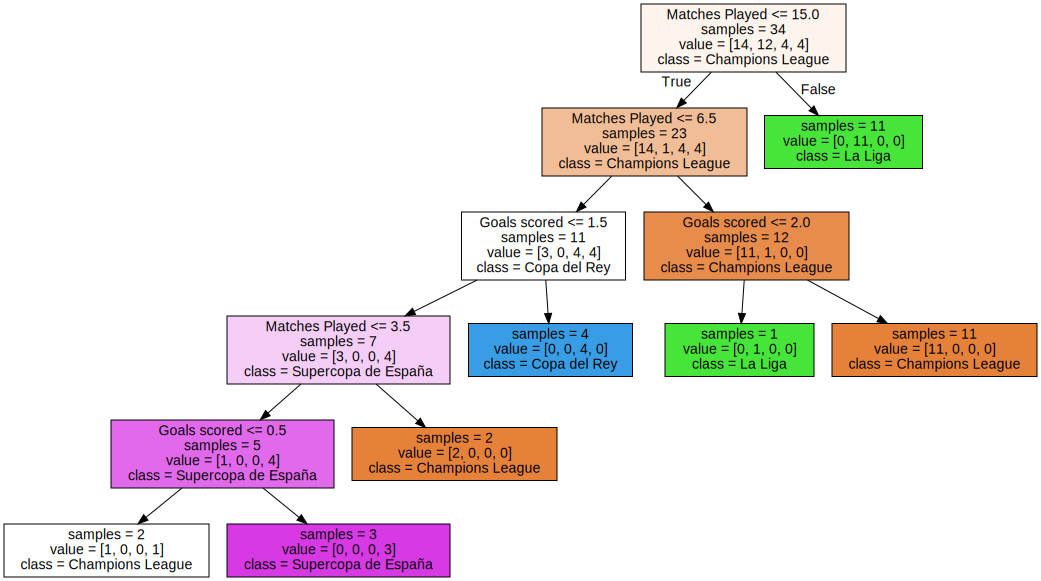

In [26]:
export_graphviz(arbol, out_file='arbol1.dot', class_names=y_names, feature_names=features_names, impurity=False, filled=True)
with open('arbol1.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [27]:
cm = confusion_matrix(y_test, y_pred)

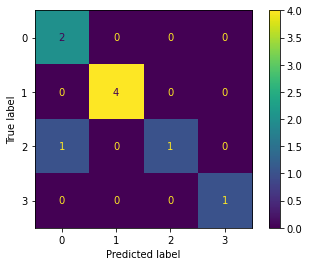

In [28]:
cm_display = ConfusionMatrixDisplay(cm).plot()

# Escalado & normalizado

In [29]:
X = np.array(messi_csv[['Goals scored', 'Minutes played']])

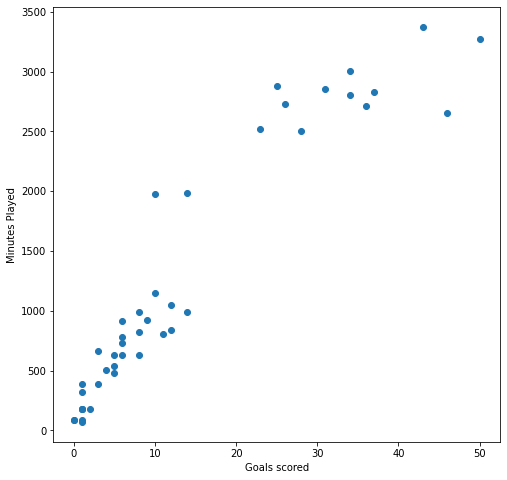

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1])
plt.ylabel('Minutes Played')
plt.xlabel('Goals scored')
plt.show()

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=12, shuffle=True)

In [32]:
knn = KNeighborsClassifier(5)

In [33]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [34]:
y_pred = knn.predict(x_test)

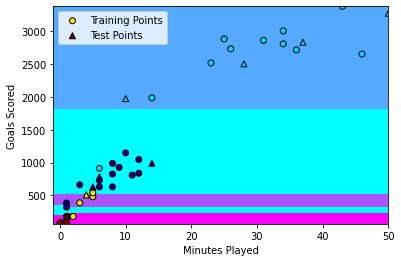

In [35]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5,  X[:, 0].max() + 0.5
y_min, y_max =  X[:, 1].min() - 0.5,  X[:, 1].max() + 0.5
h = 1.0  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = "cool", shading ='auto')

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors="k", cmap="jet",label='Training Points')
# Plot also the testing points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, edgecolors="k", cmap="jet",marker="^",label='Test Points')
plt.legend(loc="upper left")
plt.xlabel("Minutes Played")
plt.ylabel("Goals Scored")

plt.show()

In [36]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale

In [37]:
X

array([[   0,   90],
       [   1,   70],
       [   1,  322],
       [   6,  911],
       [   1,  385],
       [  14, 1983],
       [   6,  728],
       [  10, 1973],
       [   9,  927],
       [  23, 2516],
       [   8,  987],
       [  34, 2805],
       [  12, 1046],
       [  31, 2858],
       [  14,  990],
       [  50, 3270],
       [   8,  826],
       [  46, 2650],
       [   8,  630],
       [  28, 2501],
       [  10, 1147],
       [   5,  540],
       [  43, 3375],
       [   6,  630],
       [   5,  480],
       [  26, 2729],
       [   1,  180],
       [  11,  810],
       [   5,  630],
       [  37, 2828],
       [   1,  180],
       [   6,  783],
       [   4,  508],
       [  34, 3002],
       [   1,  180],
       [  12,  838],
       [   3,  388],
       [  36, 2713],
       [   0,   90],
       [   3,  662],
       [   2,  180],
       [  25, 2880],
       [   1,   90]])

In [38]:
scale(X)

array([[-0.96856774, -1.09582151],
       [-0.89761644, -1.11450485],
       [-0.89761644, -0.87909473],
       [-0.54285995, -0.32887028],
       [-0.89761644, -0.8202422 ],
       [ 0.02475045,  0.67255689],
       [-0.54285995, -0.49982287],
       [-0.25905475,  0.66321522],
       [-0.33000605, -0.31392361],
       [ 0.66331215,  1.17046798],
       [-0.40095735, -0.25787358],
       [ 1.44377645,  1.44044228],
       [-0.11715215, -0.20275772],
       [ 1.23092255,  1.48995314],
       [ 0.02475045, -0.25507108],
       [ 2.57899725,  1.87483   ],
       [-0.40095735, -0.40827449],
       [ 2.29519205,  1.29564637],
       [-0.40095735, -0.59137125],
       [ 1.01806865,  1.15645547],
       [-0.25905475, -0.10840684],
       [-0.61381125, -0.67544629],
       [ 2.08233815,  1.97291755],
       [-0.54285995, -0.59137125],
       [-0.61381125, -0.73149632],
       [ 0.87616605,  1.36944558],
       [-0.89761644, -1.01174646],
       [-0.18810345, -0.42322116],
       [-0.61381125,

In [39]:
minmax_scale(X)

array([[0.        , 0.00605144],
       [0.02      , 0.        ],
       [0.02      , 0.07624811],
       [0.12      , 0.25446293],
       [0.02      , 0.09531014],
       [0.28      , 0.57881997],
       [0.12      , 0.19909228],
       [0.2       , 0.57579425],
       [0.18      , 0.25930408],
       [0.46      , 0.74009077],
       [0.16      , 0.2774584 ],
       [0.68      , 0.82753404],
       [0.24      , 0.29531014],
       [0.62      , 0.84357035],
       [0.28      , 0.27836611],
       [1.        , 0.96822995],
       [0.16      , 0.22874433],
       [0.92      , 0.7806354 ],
       [0.16      , 0.16944024],
       [0.56      , 0.73555219],
       [0.2       , 0.32586989],
       [0.1       , 0.14220877],
       [0.86      , 1.        ],
       [0.12      , 0.16944024],
       [0.1       , 0.12405446],
       [0.52      , 0.80453858],
       [0.02      , 0.0332829 ],
       [0.22      , 0.22390318],
       [0.1       , 0.16944024],
       [0.74      , 0.83449319],
       [0.

# Tarea

Usando:

In [40]:
X_1 = scale(X)
X_2 = minmax_scale(X)

Correr nuevamente KNN y DecisionTreeClassifier y comparar los resultados con los del dataset sin normalizar o escalar.